In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("spam.csv",encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.shape

(5572, 5)

In [6]:
df["Unnamed: 2"].unique()

array([nan, ' PO Box 5249',
       ' the person is definitely special for u..... But if the person is so special',
       ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""',
       ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"',
       'this wont even start........ Datz confidence.."', 'GN',
       '.;-):-D"',
       'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""',
       ' bt not his girlfrnd... G o o d n i g h t . . .@"',
       ' I\'ll come up"',
       ' don\'t miss ur best life for anything... Gud nyt..."',
       ' just as a shop has to give a guarantee on what they sell. B. G."',
       ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"',
       ' the toughest is acting Happy with all unspoken pain inside..\\""',
       ' smoke hella weed\\""', '\\" not \\"what i need to do.\\""',
       'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD

In [7]:
df["Unnamed: 3"].unique()

array([nan, ' MK17 92H. 450Ppw 16"', ' why to miss them', 'GE',
       'U NO THECD ISV.IMPORTANT TOME 4 2MORO\\""',
       'i wil tolerat.bcs ur my someone..... But',
       ' ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\\""',
       'whoever is the KING\\"!... Gud nyt"', ' TX 4 FONIN HON',
       ' \\"OH No! COMPETITION\\". Who knew', 'IåÕL CALL U\\""'],
      dtype=object)

In [8]:
df["Unnamed: 4"].unique()

array([nan, ' just Keep-in-touch\\" gdeve.."', 'GNT:-)"',
       ' Never comfort me with a lie\\" gud ni8 and sweet dreams"',
       ' CALL 2MWEN IM BK FRMCLOUD 9! J X\\""',
       ' one day these two will become FREINDS FOREVER!"'], dtype=object)

In [9]:
df_=df
df_.shape

(5572, 5)

In [10]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)
df.shape

(5572, 2)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [13]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.target[df["target"]=="ham"]=0
df.target[df["target"]=="spam"]=1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['target'] = pd.to_numeric(df['target'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [17]:
df["target"].unique()

array([0, 1], dtype=int64)

In [18]:
df["target"].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

In [19]:
df.duplicated().sum()

403

In [20]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

In [22]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

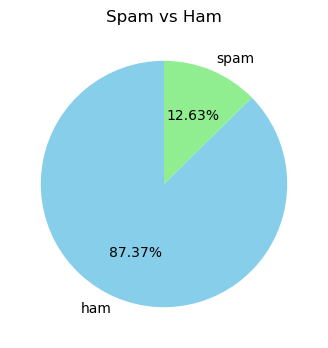

In [23]:
fig, ax=plt.subplots(figsize=(6,4))
ax.pie(df["target"].value_counts(),labels=["ham","spam"], autopct='%0.2f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title("Spam vs Ham");

In [24]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jigya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df["text"].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [26]:
df["num_characters"]=df["text"].apply(len)
df.head()

C:\Users\jigya\AppData\Local\Temp\ipykernel_10504\3990336313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"]=df["text"].apply(len)


,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df["text"].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [28]:
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

C:\Users\jigya\AppData\Local\Temp\ipykernel_10504\2367163847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df["num_sent"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

C:\Users\jigya\AppData\Local\Temp\ipykernel_10504\1325550773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sent"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[["num_characters","num_words","num_sent"]].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# Ham Messages 
df[df.target==0][["num_characters","num_words","num_sent"]].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# Spam Messages
df[df.target==1][["num_characters","num_words","num_sent"]].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


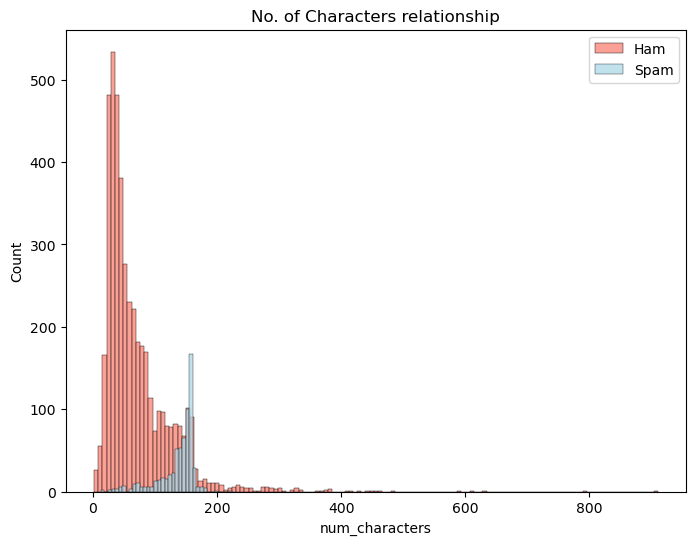

In [33]:
fig, ax=plt.subplots(figsize=(8,6))
sns.histplot(df[df.target==0]["num_characters"],label="Ham",color="salmon")
sns.histplot(df[df.target==1]["num_characters"],label="Spam",color="lightblue")
ax.set_title("No. of Characters relationship")
ax.legend();

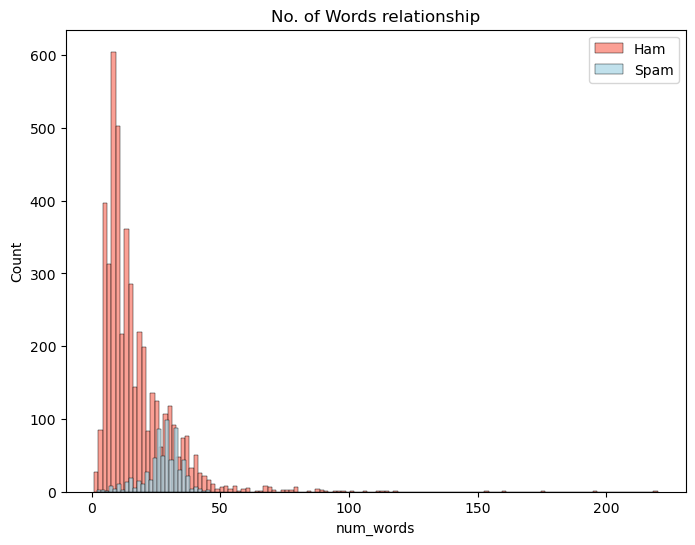

In [34]:
fig, ax=plt.subplots(figsize=(8,6))
sns.histplot(df[df.target==0]["num_words"],label="Ham",color="salmon")
sns.histplot(df[df.target==1]["num_words"],label="Spam",color="lightblue")
ax.set_title("No. of Words relationship")
ax.legend();

C:\Users\jigya\Desktop\email-spam\env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


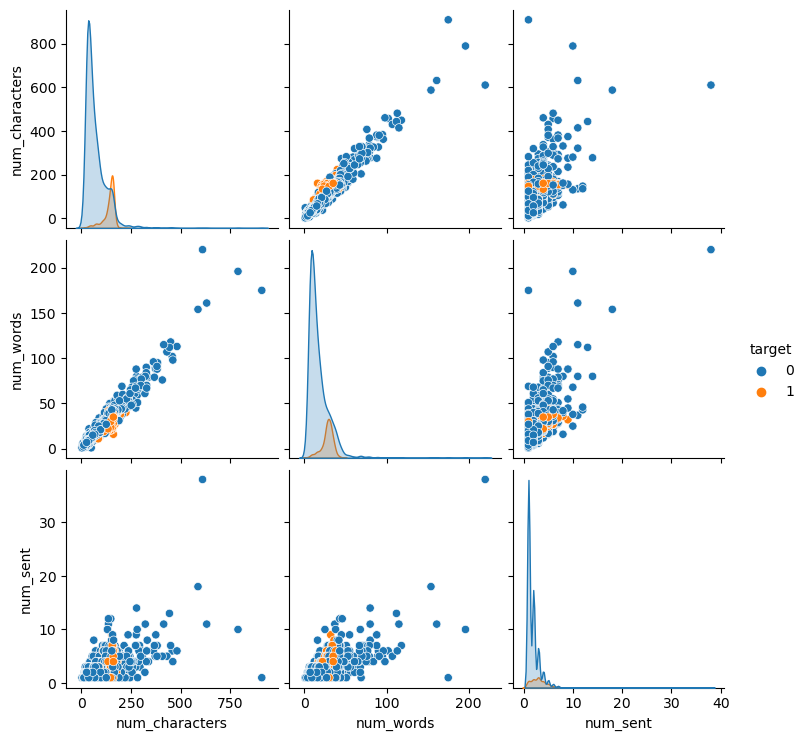

In [35]:
sns.pairplot(df,hue="target");

In [36]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,target,num_characters,num_words,num_sent
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sent,0.263939,0.624139,0.679971,1.000000


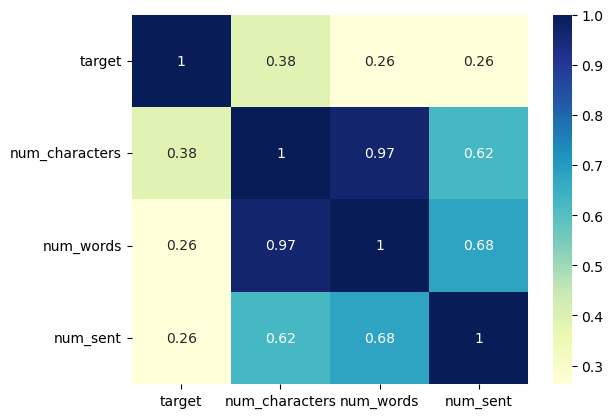

In [38]:
sns.heatmap(correlation_matrix,cmap='YlGnBu',annot=True);

### Data Preprocessing
* lowercase
* tokenization
* removal of special characters 
* removal of stop words and punctuations
* stemming

In [39]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jigya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("loving")

'love'

In [42]:
def transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [43]:
transform("Hi! % how Are YoU, JIgyasu ? did You Got your 5000$ in wallet")

'hi jigyasu got 5000 wallet'

In [44]:
df["transformed_text"]=df["text"].apply(transform)
df.head()

C:\Users\jigya\AppData\Local\Temp\ipykernel_10504\3665385951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"]=df["text"].apply(transform)


,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [45]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color="white")

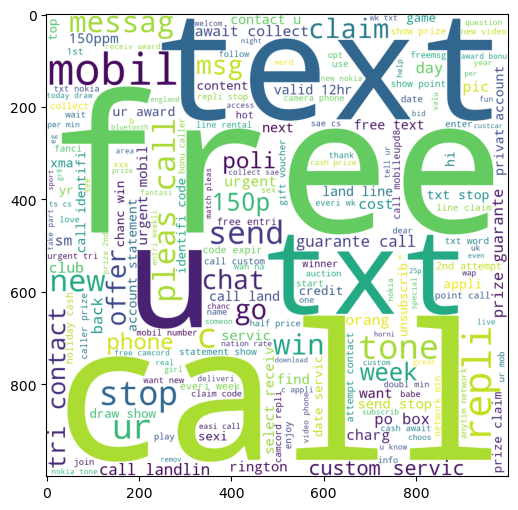

In [46]:
spam_wc=wc.generate(df[df.target==1]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(spam_wc);

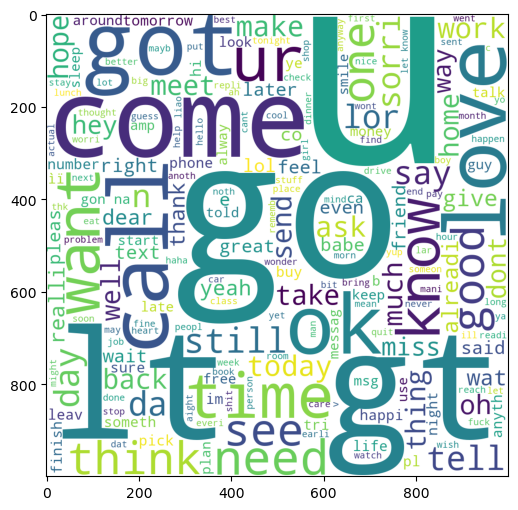

In [47]:
ham_wc=wc.generate(df[df.target==0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(ham_wc);

In [48]:
spam_corpus=[]
for msg in df[df.target==1]["transformed_text"].to_list():
    for word in msg.split():
        spam_corpus.append(word)
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [49]:
len(spam_corpus)

9939

In [50]:
from collections import Counter
data=Counter(spam_corpus).most_common(30)
data

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [51]:
words_vs_spam=pd.DataFrame(data,columns=['Word', 'Count'])
words_vs_spam

,Word,Count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [52]:
words_vs_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    30 non-null     object
 1   Count   30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


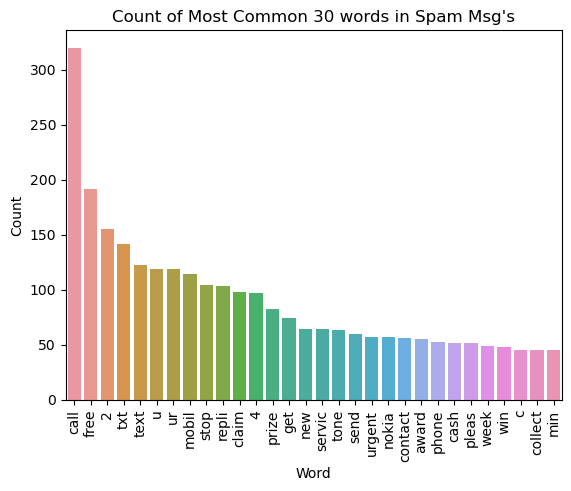

In [53]:
sns.barplot(x="Word",y="Count",data=words_vs_spam)
plt.xticks(rotation="vertical")
plt.title("Count of Most Common 30 words in Spam Msg's");

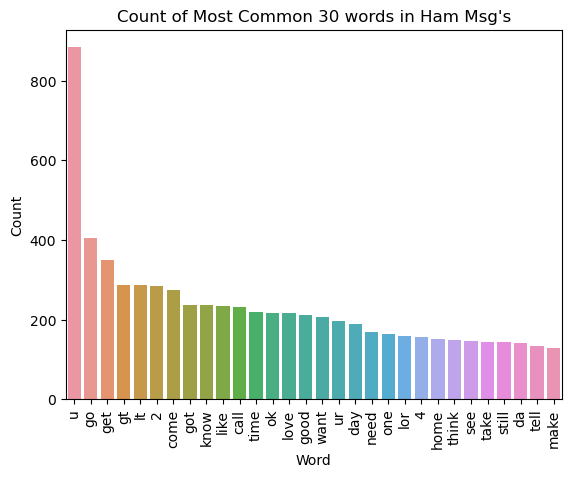

In [54]:
ham_corpus=[]
for msg in df[df.target==0]["transformed_text"].to_list():
    for word in msg.split():
        ham_corpus.append(word)
data=Counter(ham_corpus).most_common(30)
words_vs_ham=pd.DataFrame(data,columns=['Word', 'Count'])
sns.barplot(x="Word",y="Count",data=words_vs_ham)
plt.xticks(rotation="vertical")
plt.title("Count of Most Common 30 words in Ham Msg's");

### Modelling

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df["transformed_text"]).toarray()
X.shape

(5169, 6708)

In [56]:
y=df["target"].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [60]:
gnb.fit(X_train,y_train)
y_preds1=gnb.predict(X_test)

In [61]:
accuracy_score(y_test,y_preds1)

0.8800773694390716

In [62]:
confusion_matrix(y_test,y_preds1)

array([[792, 104],
       [ 20, 118]], dtype=int64)

In [63]:
precision_score(y_test,y_preds1)

0.5315315315315315

In [64]:
def scores(y_test,y_preds):
    print("Accuracy Score:", accuracy_score(y_test,y_preds))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test,y_preds))
    print("Precision Score:", precision_score(y_test,y_preds))

In [65]:
scores(y_test,y_preds1)

Accuracy Score: 0.8800773694390716
Confusion Matrix:
[[792 104]
 [ 20 118]]
Precision Score: 0.5315315315315315


In [66]:
mnb.fit(X_train,y_train)
y_preds2=mnb.predict(X_test)
scores(y_test,y_preds2)

Accuracy Score: 0.9642166344294004
Confusion Matrix:
[[871  25]
 [ 12 126]]
Precision Score: 0.8344370860927153


In [67]:
bnb.fit(X_train,y_train)
y_preds3=bnb.predict(X_test)
scores(y_test,y_preds3)

Accuracy Score: 0.9700193423597679
Confusion Matrix:
[[893   3]
 [ 28 110]]
Precision Score: 0.9734513274336283


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df["transformed_text"]).toarray()
X.shape

(5169, 3000)

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
gnb.fit(X_train,y_train)
y_preds1=gnb.predict(X_test)
scores(y_test,y_preds1)
mnb.fit(X_train,y_train)
y_preds2=mnb.predict(X_test)
scores(y_test,y_preds2)
bnb.fit(X_train,y_train)
y_preds3=bnb.predict(X_test)
scores(y_test,y_preds3)

Accuracy Score: 0.8694390715667312
Confusion Matrix:
[[788 108]
 [ 27 111]]
Precision Score: 0.5068493150684932
Accuracy Score: 0.9709864603481625
Confusion Matrix:
[[896   0]
 [ 30 108]]
Precision Score: 1.0
Accuracy Score: 0.9835589941972921
Confusion Matrix:
[[895   1]
 [ 16 122]]
Precision Score: 0.991869918699187


#### For MultiNomial naive Bayes we have precision 1.0 so this model is not giving any `False Positives`
##### After Running all simple possiblities we have `MultinomialNaiveBayes` with tidif max_features=3000, Best precision and Accuracy

In [73]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_preds2=mnb.predict(X_test)
scores(y_test,y_preds2)

Accuracy Score: 0.9709864603481625
Confusion Matrix:
[[896   0]
 [ 30 108]]
Precision Score: 1.0


In [75]:
import pickle
pickle.dump(tfidf,open("Vectorizer.pkl","wb"))
pickle.dump(mnb,open("Model.pkl","wb"))